In [39]:
from pymongo import MongoClient
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DB = "autohalle"
COLL_TEXT = "cars"
COLL_FEAT = "features"
FEATURES_COLL = "features"
CONN_STR = st.secrets["mongodb"]["mongoURI"]
DEFAULT_AI_MODEL = 0 # 0 = ChatGPT, 1 = Mistral, 2 = DeepSeek
OPENAI_MODEL_EXTRACTION = "gpt-4o"  # Model for feature extraction

In [40]:
# Function to connect to MongoDB Atlas
def connect_to_mongodb():
    # Replace <connection_string> with your actual connection string
    try:
        client = MongoClient(CONN_STR)
        # st.success("Connected to MongoDB Atlas successfully.")
        return client
    except Exception as e:
        print(f"Error connecting to MongoDB Atlas: {e}")
        return None

# Function to fetch items from MongoDB
def fetch_items(collection_name):
    client = connect_to_mongodb()

    if client:
        # Replace <dbname> and <collection_name> with your actual database and collection names
        db = client[DB]
        collection = db[collection_name]

        # Fetch items from MongoDB
        items = list(collection.find())

        return items

In [41]:
# Fetch car items from MongoDB
items_cars = fetch_items(COLL_TEXT)
# convert items_cars to a DataFrame 
df_cars = pd.DataFrame(items_cars)

In [42]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   _id       312 non-null    object
 1   date      312 non-null    object
 2   time      312 non-null    object
 3   model     312 non-null    object
 4   year      312 non-null    int64 
 5   specials  296 non-null    object
 6   descr     312 non-null    object
 7   ai_model  281 non-null    object
dtypes: int64(1), object(7)
memory usage: 19.6+ KB


In [43]:
df_cars.head()

,_id,date,time,model,year,specials,descr,ai_model
0,65b780239f31091bdfe9f79a,29-01-2024,11:38:16,Audi A6,2021,Panoramadach,"Der Audi A6 ist ein beeindruckendes Fahrzeug, ...",NaN
1,65b781de85081232ec2a5adb,29-01-2024,10:45:46,Fiat Multipla,2001,None,Das Fiat Multipla ist ein einzigartiges Kompak...,NaN
2,65b7b8fa85081232ec2a5b16,29-01-2024,14:40:53,Toyota Celica,1975,None,Das Toyota Celica ist ein sportliches Coupé mi...,NaN
3,65b7b98185081232ec2a5b1d,29-01-2024,14:43:09,BMW M340i Touring,2019,Braunes Leder,Der BMW M340i Touring ist ein Kraftpaket auf R...,NaN
4,65b7be4685081232ec2a5b2e,29-01-2024,15:03:29,Porsche Macan,2020,Panoramadach,"Der Porsche Macan ist ein kompakter SUV, der f...",NaN


In [44]:
df_cars.tail()

,_id,date,time,model,year,specials,descr,ai_model
307,68a5cf9e80fe408cebaf3022,20-08-2025,13:37:32,Mini Cooper S Cabrio Aut.,2019,Automatik Kamera Leder Harman & Kardon Head-Up...,Der Mini Cooper S Cabrio Aut. beeindruckt mit ...,gpt-3.5-turbo
308,68a6f5b19630eae1a910befd,21-08-2025,10:32:03,Subaru Forester Platinum,2023,"Audiosystem: Harman-Kardon, Klimaautomatik 2-Z...",Der **Subaru Forester Platinum** überzeugt mit...,mistral-large-latest
309,68a7326b9630eae1a910bf73,21-08-2025,14:51:20,Audi A4 Allroad 45 TFSI,2022,"Sonderausstattung: Audi Smartphone Interface, ...",Der Audi A4 Allroad 45 TFSI begeistert mit ein...,gpt-3.5-turbo
310,68a738079630eae1a910bf96,21-08-2025,15:15:17,Audi A4 Allroad 45 TFSI quattro,2022,Panoramadach Tempomat Navigation Sitzheizung L...,Der Audi A4 Allroad 45 TFSI quattro ist ein lu...,gpt-3.5-turbo
311,68a73bd19630eae1a910bfb3,21-08-2025,15:31:15,Hyundai Tucson,2022,"Hybrid 195 kW (Motor 1,6 Ltr. - 132 kW T-GDI),...",Der **Hyundai Tucson** überzeugt mit einer gel...,mistral-large-latest


In [45]:
# df_cars.to_csv('cars.csv', index=False)

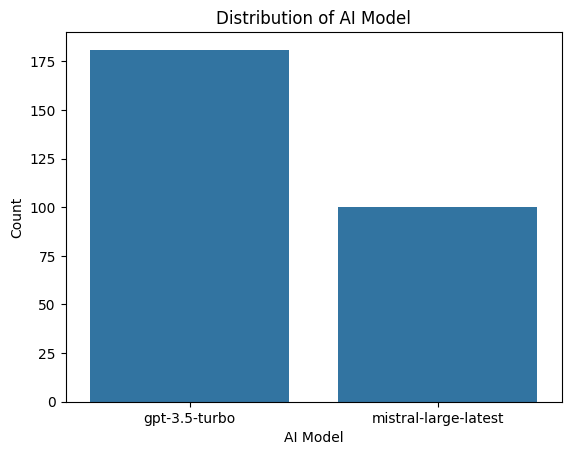

In [46]:
# plot distribution of ai_model 

sns.countplot(data=df_cars, x='ai_model')
plt.title('Distribution of AI Model')
plt.xlabel('AI Model')
plt.ylabel('Count')
plt.show()

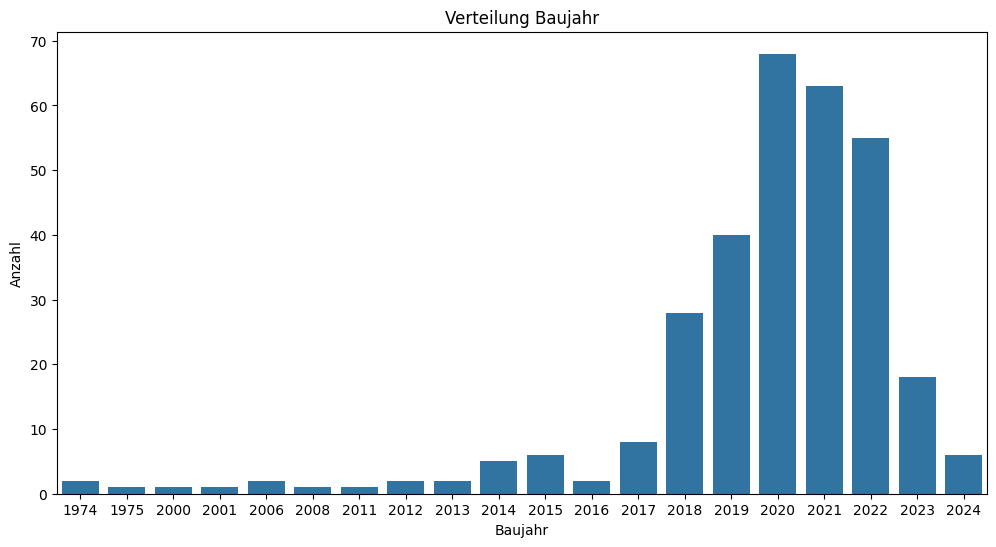

In [47]:
# plot distribution of year
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cars, x='year')
plt.title('Verteilung Baujahr')
plt.xlabel('Baujahr')
plt.ylabel('Anzahl')
plt.show()

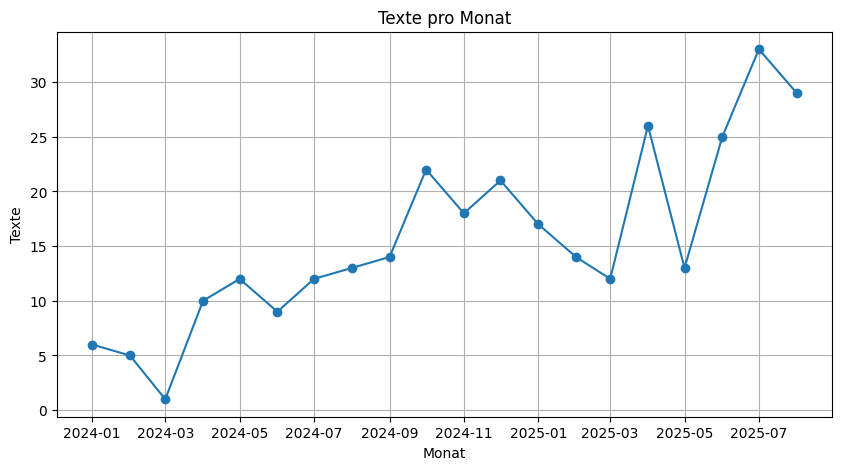

In [51]:
# convert date and time to datetime
df_cars['date'] = pd.to_datetime(df_cars['date'], format='%d-%m-%Y')

# Plot histogram of date binned by month (col: 'date' - datetime)
# Group by month
df_monthly = df_cars.groupby(df_cars['date'].dt.to_period('M')).size()

# Convert PeriodIndex to datetime for plotting
df_monthly.index = df_monthly.index.to_timestamp()

# Plot
plt.figure(figsize=(10,5))
plt.plot(df_monthly.index, df_monthly.values, marker='o', linestyle='-')
plt.title("Texte pro Monat")
plt.xlabel("Monat")
plt.ylabel("Texte")
plt.grid(True)
plt.show()

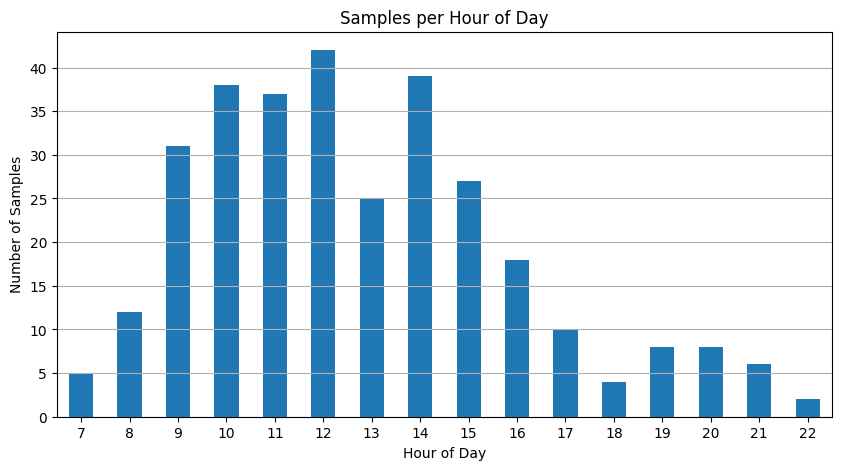

In [ ]:
# Convert to datetime.time objects
df_cars['time'] = pd.to_datetime(df_cars['time'], format='%H:%M:%S').dt.time

# Extract hour
df_cars['hour'] = pd.to_datetime(df_cars['time'], format='%H:%M:%S').dt.hour

# Count samples per hour
df_hourly = df_cars.groupby('hour').size()

# Plot as bar chart
plt.figure(figsize=(10,5))
df_hourly.plot(kind='bar', rot=0)
plt.title("Texte pro Stunde")
plt.xlabel("Stunde des Tages")
plt.ylabel("Anzahl der Texte")
plt.grid(axis="y")
plt.show()